In [2]:
import numpy as np
import collections
import pandas as pd
import itertools
import seaborn as sns
import time
import json
import re
import os
import matplotlib.pyplot as plt

print os.getcwd()

/Users/asd/coding/ingredient2vec


In [3]:
'''
Load data & Path

'''

path = 'data/'
ingr_info = 'ingr_info.tsv'
comp_info = 'comp_info.tsv'
ingr_comp = 'ingr_comp.tsv'


# {ingredient_id: [ingredient_name, ingredient_category]}
def load_ingredients(path):
    ingredients = {}
    ingredients_list = []
    with open(path, 'r') as f:
        for line in f:
            if line[0] == '#':
                pass
            else:
                line_split = line.rstrip().split('\t')
                ingredients_id = line_split[0]
                ingredients_list = line_split[1:]
                ingredients[ingredients_id] = ingredients_list
    return ingredients

# {compound_id: [compound_name, CAS_number]}
def load_compounds(path):
    compounds = {}
    compounds_list = []
    with open(path, 'r') as f:
        for line in f:
            if line[0] == '#':
                pass
            else:
                line_split = line.rstrip().split('\t')
                compounds_id = line_split[0]
                compounds_list = line_split[1:]
                compounds[compounds_id] = compounds_list
    return compounds

# {ingredient_id: [compound_id1, compound_id2, ...] }
def load_relations(path):
    relations = {}
    with open(path, 'r') as f:
        for line in f:
            if line[0] == '#':
                pass
            else:
                line_split = line.rstrip().split('\t')
                ingredient_id = line_split[0]
                compound_id = line_split[1]
                
                if ingredient_id in relations:
                    relations[ingredient_id].append(compound_id)
                    
                else:
                    relations[ingredient_id] = [compound_id]
                    
    return relations


# {compound_id: [ingredient1, ingredient2, ...] }
def load_inverse_relations(path):
    inverse_relations = {}
    with open(path, 'r') as f:
        for line in f:
            if line[0] == '#':
                pass
            else:
                line_split = line.rstrip().split('\t')
                ingredients_id = line_split[0]
                compounds_id = line_split[1]
                
                if compounds_id in inverse_relations:
                    inverse_relations[compounds_id].append(ingredients_id)
                    
                else:
                    inverse_relations[compounds_id] = [ingredients_id]
                    
    return inverse_relations



ingredients = load_ingredients(path+ingr_info)
compounds = load_compounds(path+comp_info)
relations = load_relations(path+ingr_comp)
inverse_relations = load_inverse_relations(path+ingr_comp)

In [4]:
'''
Relation Analysis
Ingredients & Compounds
'''

print '# of ingredients:', len(ingredients)
print '# of compounds:', len(compounds)

print '\n############################\n'

print '# of ingredients with relations:', len(relations)
print '# of compounds with relations:', len(inverse_relations)


#print ingredients
#print compoudns
print relations
#print inverse_relations


# of ingredients: 1530
# of compounds: 1107

############################

# of ingredients with relations: 1525
# of compounds with relations: 1107
{'344': ['118'], '345': ['991'], '346': ['273', '426', '595', '424', '886', '442', '673', '1088', '433', '822', '325', '657', '614', '503'], '347': ['611'], '340': ['906', '136'], '341': ['350', '260', '1088'], '342': ['1028'], '343': ['1089'], '348': ['346'], '349': ['995'], '298': ['825', '274', '275', '892', '280', '281', '282', '241', '288', '292', '837', '294', '841', '249', '299', '301', '583', '423', '591', '861', '595', '597', '599', '600', '40', '880', '875', '606', '324', '317', '724', '372', '890', '619', '56', '893', '69', '345', '73', '902', '357', '358', '84', '909', '363', '912', '913', '645', '918', '93', '920', '922', '925', '656', '657', '798', '107', '108', '390', '395', '397', '670', '398', '118', '400', '941', '406', '410', '684', '411', '215', '136', '800', '958', '674', '697', '847', '143', '424', '704', '969', '971'

In [4]:
for rela in relations:
    ingr_id, comp_id_list = rela, relations[rela]
    print "Ingredient:", ingredients[ingr_id][0]
    print "Ingredient Category:", ingredients[ingr_id][1]
    print "# of Compounds Contain:", len(comp_id_list)
    for comp_id in comp_id_list:
        print compounds[comp_id][0],
    print
    print

Ingredient: ruta_chalepensis_oil
Ingredient Category: plant derivative
# of Compounds Contain: 1
2-nonanone

Ingredient: passiflora_mollissima
Ingredient Category: fruit
# of Compounds Contain: 1
butyl_butyrate

Ingredient: mastic_gum_oil
Ingredient Category: plant derivative
# of Compounds Contain: 14
terpinyl_acetate thymol 2-octanone 2-pentylfuran p,a,a-trimethylbenzyl_alcohol nerolidol myrcene 2-formyl-6,6-dimethyl_bicyclo_[3.1.1]_hept-2-ene isopulegol salicylaldehyde p-mentha-1,8-dien-7-ol n-octanal o-methylanisole veratraldehyde

Ingredient: copaiba
Ingredient Category: plant derivative
# of Compounds Contain: 1
benzyl_alcohol

Ingredient: teucrium_chamaedrys
Ingredient Category: plant
# of Compounds Contain: 2
bornyl_acetate isoamyl_alcohol

Ingredient: seed_oil
Ingredient Category: plant derivative
# of Compounds Contain: 3
p-menth-1-ene-9-al d-piperitone 2-formyl-6,6-dimethyl_bicyclo_[3.1.1]_hept-2-ene

Ingredient: octopus
Ingredient Category: fish/seafood
# of Compounds Conta

lauric_acid 3-methyl-2-butanol isoborneol g-hexalactone hexyl_acetate isopropyl_acetate butyl_alcohol l-_and_dl-alanine 1-octanol 2-methoxy-4-vinylphenol hexyl_butyrate methyl-3-methylthiopropionate butyl_anthranilate formic_acid heptyl_butyrate cinnamyl_butyrate ethyl_benzoate nonanoic_acid ethyl_octanoate undecyl_alcohol acetone methylsulfinylmethane linalool 4-heptanone 2-octanol 2-octanone nonyl_acetate propyl_isobutyrate propyl_alcohol butyl_stearate g-undecalactone ethyl_crotonate l-malic_acid phenethyl_acetate isoamyl_formate methyl_isobutyrate anisole (+/?)_2-methyl-1-butanol trans-2-hexenoic_acid butyl_formate propyl_butyrate p,a,a-trimethylbenzyl_alcohol isobutyl_acetate hexyl_formate lauryl_alcohol benzyl_alcohol n-butyl_valerate propyl_heptanoate 1-methylnaphthalene methyl_hexanoate 4-(2,6,6-trimethyl-cyclohexa-1,3-dienyl)but-2-en-4-one p-mentha-1,3-diene amyl_alcohol 3-methyl-1-pentanol n-propyl_hexanoate isoamyl_octanoate decanoic_acid 4-hydroxybenzoic_acid ethyl_butyrate

Ingredient Category: herb
# of Compounds Contain: 4
isovaleric_acid menthone methyl_sulfide menthyl_isovalerate

Ingredient: milk
Ingredient Category: dairy
# of Compounds Contain: 118
4-methyl-2-pentanone d-undecalactone 2-methyl-3-butenal lauric_acid vanillin,_natural g-decalactone 3-hexanone 1-octanol formic_acid pyridine ethyl_benzoate nonanoic_acid taurine methylsulfinylmethane vanillin maltol 2-octanone nonyl_acetate methyl_sulfide 2-methylpyrazine pyrazine ethyl_acetate heptanoic_acid 2,3,5-trimethylpyrazine lauryl_alcohol isoamyl_acetate 2-dodecenal furfuryl_alcohol 1-methylnaphthalene g-nonalactone g-dodecalactone 2,3-dimethylpyrazine 2-heptanone 2-methyl-5-vinylpyrazine indole n-butyric_acid pyrrolidine 2-hexenal dimethyl_trisulfide 2-pentanone lactic_acid 2,6-dimethylpyrazine n-octanal hexanoic_acid dl-(3-amino-3-carboxypropyl)dimethylsulfonium_chloride pyruvic_acid 1-octen-3-one 2-methyl-1-propanethiol ethyl_laurate decanal allyl_isothiocyanate 2-nonanone heptyl_alcohol 2-t

2,4-nonadienal 2-methyltetrahydrothiophen-3-one lauric_acid paraldehyde 2-pentylfuran isopentylamine 3,5-dimethyl-1,2,4-trithiolane 3-(methylthio)_propionaldehyde methylcyclopentenolone 3-octanone 1-octanol adipic_acid 2-methyl-3-tetrahydrofuranthiol benzoic_acid oleic_acid methyl_disulfide 2,5_diethyl-3-methylpyrazine 5-methylhexanoic_acid pyridine 3,5-diethyl-2-methylpyrazine nonanoic_acid taurine 1-decanol 2,6-dimethylpyridine diacetyl 2,5-dimethylthiazole disodium_5'-guanylate isobutyl_alcohol lauric_aldehyde 2-octanone phenylacetaldehyde propionaldehyde propyl_alcohol 2-decenal 2-methylpyrazine 2-ethyl-3,5(6)-dimethylpyrazine 5h-5-methyl-6,7-dihydrocyclopenta(b)pyrazine methyl_mercaptan 4-methyl-2,6-dimethoxyphenol g-undecalactone 2,6-dimethylpyrazine trans-2-hexenoic_acid disodium_5'-inosinate heptanoic_acid undecanal 2,3,5-trimethylpyrazine valeric_acid 4-methyl-5-vinylthiazole cyclopentanone lauryl_alcohol 1-octen-3-ol 2,3-pentanedione 2-hexenal furfuryl_alcohol 2,3-diethyl-5-m

ethyl_levulinate methyl_valerate lauric_acid ethyl_lactate g-hexalactone vanillin,_natural hexyl_acetate isopropyl_acetate 3-methyl-1-pentanol ethyl_thioacetate l-_and_dl-alanine 1-octanol 2-methoxy-4-vinylphenol diethyl_malate nonanoic_acid ethyl_octanoate phenethylamine diethyl_malonate ethyl_3-hydroxyhexanoate 2-hydroxybenzoic_acid 2-octanol ethyl_palmitate 2-octanone 2-acetylfuran methyl_sulfide propyl_alcohol 4-hydroxy-3-methoxybenzoic_acid ethyl_phenylacetate octyl_acetate l-malic_acid p-ethylphenol 2,6-dimethyl-4-heptanol ethyl_acetate isoamyl_acetate 2-methoxy-4-methylphenol isobutyl_acetate methyl_acetate 2,3-pentanedione furfuryl_alcohol 4-hydroxy-3,5-dimethoxybenzaldehyde ethyl_salicylate g-nonalactone 4-(2,6,6-trimethyl-cyclohexa-1,3-dienyl)but-2-en-4-one amyl_alcohol isoamyl_octanoate decanoic_acid 2-heptanone 4-hydroxybenzoic_acid ethyl_butyrate hexyl_octanoate indole 4-methylpentanoic_acid pyrrolidine 2-hexenal dimethyl_trisulfide 3-methyl-2-butanol ethyl-3-hydroxybutyra

citronellol (e)-2-hexenyl_hexanoate benzyl_acetate isopulegol methyl_benzoate isoeugenol camphene

Ingredient: bitter_orange_oil
Ingredient Category: plant derivative
# of Compounds Contain: 4
acetic_acid nonyl_alcohol nonyl_octanoate heptanal

Ingredient: roasted_coconut
Ingredient Category: nut/seed/pulse
# of Compounds Contain: 56
d-undecalactone lauric_acid 9,12-octadecadienoic_acid_(48%)_plus_9,12,15-octadeca-_trienoinc_acid_(52%)_(methyl_esters) 1-octanol 2-pentanol oleic_acid propionic_acid 3,5-diethyl-2-methylpyrazine nonanoic_acid 5-methylfurfural ethyl_octanoate benzothiazole 2-pentadecanone 2-octanol d-hexalactone m-cresol ethyl_acetate heptanoic_acid 2-undecanone valeric_acid 2,3,5-trimethylpyrazine furfuryl_alcohol delta-tetradecalactone 3-hexen-1-ol hydrogen_sulfide phenethyl_alcohol methyl_myristate 2-ethyl-5-methylpyrazine 2,3-dimethylpyrazine d-decalactone 2-heptanone o-cresol 2-undecanol palmitic_acid 5-_and_6-decenoic_acid ethyl_myristate 2-nonanol n-octanal hexyl_al

2-hydroxy-4-methyl_benzaldehyde g-nonalactone lauric_acid 2-pentylfuran alpha-terpineol g-hexalactone thymol methyl_hexanoate methylcyclopentenolone maltol indole 1-hexadecanol p-isopropylbenzyl_alcohol palmitic_acid phenethyl_alcohol hexyl_formate nonanoic_acid 5-methylfurfural heptanoic_acid 6-methyl-3,5-heptadien-2-one phenol 2,3,5-trimethylpyrazine hexanoic_acid octanoic_acid methyl-2-pyrrolyl_ketone difurfuryl_ether phenylacetaldehyde hexyl_alcohol furfuryl_acetate 2-formyl-6,6-dimethyl_bicyclo_[3.1.1]_hept-2-ene nerol 3-phenylpropionic_acid p,a,a-trimethylbenzyl_alcohol valeric_acid 2,3,5,6-tetramethylpyrazine furfuryl_propionate 2-methyltetrahydrofuran-3-one 1-octen-3-ol guaiacol

Ingredient: yellow_mombin
Ingredient Category: fruit
# of Compounds Contain: 1
p-methylanisole

Ingredient: cod_liver_oil
Ingredient Category: animal product
# of Compounds Contain: 1
2-pentenal

Ingredient: tamarind
Ingredient Category: spice
# of Compounds Contain: 51
g-nonalactone 4-(2,6,6-trimethyl

2,4-nonadienal jasmone lauric_acid 2-pentanone hexyl_acetate isopropyl_acetate 3-(methylthio)_propionaldehyde 1-octanol 2-methoxy-4-vinylphenol nonanoic_acid maltol 2-octanone methyl_sulfide propyl_alcohol methyl_nicotinate 2,3,5-trimethylpyrazine 3-penten-2-one 2,3-pentanedione furfuryl_alcohol 1-methylnaphthalene g-nonalactone 4-(2,6,6-trimethyl-cyclohexa-1,3-dienyl)but-2-en-4-one p-mentha-1,3-diene 2-nonenal decanoic_acid 9-octadecenal 4-methylpentanoic_acid 3-methyl-2-butanol g-hexalactone p-vinylphenol 3-hexanol 3-heptanone n-octanal hexanoic_acid lauryl_alcohol allyl_isothiocyanate a-methylbenzyl_alcohol 3-methyl-2-buten-1-ol a-ionone ethyl_alcohol 2-acetylthiazole 4-methyl-5-thiazoleethanol methyl_salicylate vanillin alpha-terpineol 2-isobutyl-3-methoxypyrazine 3-octanone 2-pentanol 2-methoxy-3-(1-methylpropyl)pyrazine methyl_disulfide nerolidol heptanoic_acid 2-methoxy-3_(5_and_6)-isopropylpyrazine propionaldehyde 2-decenal 2-heptanol theobromine 2,3,5,6-tetramethylpyrazine g-b

d-undecalactone lauric_acid 2,6,10-trimethyl-2,6,10-pentadecatrien-14-one hexyl_acetate isopropyl_acetate 1-octanol methyl-3-methylthiopropionate 2-ethyl-4-hydroxy-5-methyl-3(2h)-furanone benzyl_propionate 2-pentylfuran heptyl_butyrate 2,6,6-trimethyl-1,2-cyclohexen-1-carboxaldehyde nonyl_acetate methyl_linoleate_(48%)_methyl_linolenate_(52%)_mix-ture 2-ethylbutyraldehyde butan-3-one-2-yl_butanoate ethyl_acetate isoamyl_acetate isobutyl_acetate lauryl_alcohol hydroxynonanoic_acid,_d-lactone methyl_hexanoate p-mentha-1,3-diene 2-nonenal 3-methylbutyl-2-methylpropanoate 3-phenylpropyl_acetate hexyl_octanoate 2-methylbutyl-2-methyl_butyrate 2-hexenal methyl_valerate 3-hexanol lactic_acid 3-(methylthio)propyl_acetate n-octanal ethyl-3-methylthiopropionate 1-octen-3-yl_acetate methyl_acetate 2-methylbutyl_acetate ethyl_laurate 6-methyl-5-hepten-2-one 2-nonanone (e)-2-octen-1-ol d,l-valine carvyl_acetate 6,10-dimethyl-5,9-undecadien-2-one piperonal isoamyl_propionate heptyl_alcohol alpha-ter

terpinyl_acetate methyl_hexanoate limonene_(d-,l-,_and_dl-) p-mentha-1,3-diene fenchyl_alcohol alpha-terpineol safrole methyl_citronellate piperonal terpinolene ascorbic_acid linalyl_acetate methyl_heptanoate nerolidol eugenol thujan-4-ol methyl_benzoate myrtenol a-phellandrene hexanoic_acid d-camphor 4'-methylacetophenone b-pinene methyl_phenylacetate eucalyptol n-(4-hydroxy-3-methoxybenzyl)-8-methyl-6-nonena-mide 2-methylvaleric_acid eugenyl_methyl_ether phenylacetic_acid hydroxycitronellal p-cymene p-mentha-1,4-diene methyl_isovalerate d-piperitone p,a,a-trimethylbenzyl_alcohol citronellal 2(10)-pinen-3-ol methyl_octanoate methyl-3-hexenoate

Ingredient: anise_hyssop
Ingredient Category: herb
# of Compounds Contain: 9
4-(2,6,6-trimethyl-cyclohexa-1,3-dienyl)but-2-en-4-one estragole 2-pentylfuran b-pinene thymol 1-octen-3-ol pulegone 3-octanone 1-octen-3-yl_acetate

Ingredient: wood_tar
Ingredient Category: plant derivative
# of Compounds Contain: 1
maltol

Ingredient: dairy
Ingredie

2-tridecanone 2-pentadecanone 2-nonanone n-valeraldehyde lauric_acid d-hexalactone d-octalactone methyl_myristate 2-undecanone d-dodecalactone o-cresol decanal 3-hexen-1-ol 2-nonanol isoamyl_butyrate 2-heptanone m-cresol octanoic_acid

Ingredient: lindera_citriodora
Ingredient Category: plant
# of Compounds Contain: 1
citral_(neral)

Ingredient: cape_gooseberry
Ingredient Category: fruit
# of Compounds Contain: 85
3-hexen-1-ol p,a,a-trimethylbenzyl_alcohol lauric_acid methyl_salicylate vanillin 2-pentylfuran furfural alpha-terpineol methyl_isovalerate 9,12-octadecadienoic_acid_(48%)_plus_9,12,15-octadeca-_trienoinc_acid_(52%)_(methyl_esters) 1-octanol 2-pentanol 2-methylbutyraldehyde (d-,_l-,_dl-,_meso)_tartaric_acid linalyl_acetate 1-hexadecanol oleic_acid nonanoic_acid 2,5-dimethyl-4-methoxy-3(2h)-furanone linalool diethyl_malonate lauric_aldehyde hexanal heptyl_butyrate methyl_butyrate phenylacetaldehyde methyl_sulfide propyl_alcohol b-pinene methyl_benzoate methyl_isobutyrate isoam

# of Compounds Contain: 3
p-methylanisole benzyl_acetate farnesol

Ingredient: parmesan
Ingredient Category: dairy
# of Compounds Contain: 2
2-ethyl-1-hexanol 3-methylpentanoic_acid

Ingredient: spermaceti_oil
Ingredient Category: plant derivative
# of Compounds Contain: 1
1-hexadecanol

Ingredient: feces
Ingredient Category: animal product
# of Compounds Contain: 1
skatole

Ingredient: oak_musk
Ingredient Category: plant derivative
# of Compounds Contain: 3
nonanoic_acid geraniol nonyl_alcohol

Ingredient: crayfish
Ingredient Category: fish/seafood
# of Compounds Contain: 24
thiazole pyrrole 3-(methylthio)_propionaldehyde 2-heptanone 1-octanol 3-methylbutyraldehyde dimethyl_trisulfide methyl_disulfide undecyl_alcohol phenol 2-ethyl-3-methylpyrazine n-octanal 2-octanone b-pinene 2-methylpyrazine pyridine 2-nonanone heptyl_alcohol 3-nonanone 2-ethylpyrazine 2,3,5-trimethylpyrazine isoamyl_alcohol nonyl_alcohol 1-methylnaphthalene

Ingredient: sauvignon_blanc_grape
Ingredient Category: f

hexanoic_acid carvone furfural bornyl_acetate 3-octanone linalyl_formate linalyl_isobutyrate hexyl_butyrate linalyl_acetate n-butyric_acid benzyl_acetate coumarin_(prohibited) 3-hexanol linalyl_butyrate geranyl_acetate methyl_benzoate isoeugenol linalool_oxide diacetyl 2-methylbutyric_acid (e)-2-hexenyl_hexanoate 2-octanol borneol hexyl_alcohol 1-octen-3-ol d-camphor eucalyptol decanal p-mentha-1,8-dien-7-al acetone nerol hexyl_isobutyrate camphene isovaleric_acid geraniol geranyl_butyrate 1-octen-3-yl_butyrate 3-octanol linalyl_propionate

Ingredient: black_chokecherry
Ingredient Category: fruit
# of Compounds Contain: 59
terpinyl_acetate methyl_salicylate vanillin 2-pentylfuran furfural alpha-terpineol 1-octanol (d-,_l-,_dl-,_meso)_tartaric_acid linalyl_acetate methyl-3-methylthiopropionate hexyl_hexanoate linalool theaspirane lauric_aldehyde hexanal heptyl_butyrate methyl_butyrate phenylacetaldehyde cis-3-hexenyl_formate methyl_sulfide methyl_benzoate p-mentha-1,8-dien-7-ol isoamyl_

2,4-nonadienal lauric_acid 3,5-dimethyl-1,2,4-trithiolane 3-(methylthio)_propionaldehyde methylcyclopentenolone 1-octanol adipic_acid 2,5_diethyl-3-methylpyrazine 5-methylhexanoic_acid 3,5-diethyl-2-methylpyrazine nonanoic_acid taurine 2,6-dimethylpyridine disodium_5'-guanylate 2-octanone propyl_alcohol 2-methylpyrazine ethyl_acetate 5h-5-methyl-6,7-dihydrocyclopenta(b)pyrazine 4-methyl-2,6-dimethoxyphenol g-undecalactone trans-2-hexenoic_acid disodium_5'-inosinate heptanoic_acid 4-methyl-5-vinylthiazole 2,3,5-trimethylpyrazine lauryl_alcohol 2,3-pentanedione furfuryl_alcohol (e)-2-decenoic_acid hydroxynonanoic_acid,_d-lactone g-nonalactone g-dodecalactone 2-nonenal 4-acetyl-2-methylpyrimidine isobutyric_acid benzyl_methyl_sulfide 2-heptanone indole 4-methylthiazole d,l-methionine 2-acetyl-3-methylpyrazine dimethyl_trisulfide 2-pentanone g-hexalactone 2,6-dimethylpyrazine n-octanal hexyl_alcohol 2-methylbutyric_acid methyl-2-pyrrolyl_ketone 2-methyl-1-propanethiol decanal g-valerolacto

(+/?)_heptan-3-yl_butyrate propyl_acetate (d-,_l-,_dl-,_meso)_tartaric_acid p-mentha-1,3-diene propyl_alcohol 3-methylbutyl-2-methylpropanoate pyridine 2-nonanone isoamyl_benzoate valeric_acid p-mentha-1,4-diene methyl-3-methylthiopropionate heptyl_butyrate propionic_acid methyl_isovalerate d,l-valine carvyl_acetate 3-(methylthio)_propionaldehyde isovaleric_acid phosphoric_acid 3-methylthio-1-hexanol propyl_isovalerate 2-methylpropyl-3-methylbutyrate 2-methylbutyl-3-methylbutanoate

Ingredient: raspberry
Ingredient Category: fruit
# of Compounds Contain: 130
terpinyl_acetate jasmone lauric_acid 1-decanol ethyl_lactate hexyl_acetate 1-octanol 2-methoxy-4-vinylphenol adipic_acid 2-pentenal methyl-3-methylthiopropionate nonanoic_acid methylsulfinylmethane linalool 4-hydroxy-5-methyl-3(2h)-furanone dihydro-a-ionone 2-octanone d-hexalactone methyl_sulfide propyl_alcohol methyl_benzoate isoamyl_acetate acetone ethyl_acetate diethyl_succinate verbenol benzyl_alcohol 3-methyl-2-butenal 1,1-dim

2,4-nonadienal l-_and_dl-alanine 3,5-diethyl-2-methylpyrazine 2,6-dimethylpyridine 4-hydroxy-5-methyl-3(2h)-furanone 2-octanone methyl_sulfide propyl_alcohol 2-methylpyrazine ethyl_acetate disodium_5'-inosinate 2-isobutyl-3-methylpyrazine trans,_trans-2,4-hexadienal lauryl_alcohol l-tyrosine g-dodecalactone 2,3-dimethylpyrazine ethyl_butyrate 4-methylthiazole 2-hexenal dimethyl_trisulfide g-hexalactone tolualdehydes,_mixed_o-,_m-,_p- methyl_ethyl_trisulfide 3-heptanone n-octanal methyl-2-pyrrolyl_ketone 2-methyl-1-propanethiol 1-octen-3-ol decanal 2-nonanone trimethylamine isoamyl_alcohol 2,4,5-trimethyl_thiazole 2-methyltetrahydrothiophen-3-one methyl_salicylate alpha-terpineol isopentylamine bis-(methylthio)methane piperidine oleic_acid propionic_acid 2-methyl-3-furanthiol methyl_disulfide 1-decanol nona-2-trans,-6-cis-dienal lauric_aldehyde acetylpyrazine methyl_butyrate allyl_sulfide phenylacetaldehyde b-pinene 2-heptylfuran methyl_mercaptan ethyl_octadecanoate 2-ethyl-3,5(6)-dimet

Ingredient: smoke
Ingredient Category: plant derivative
# of Compounds Contain: 5
4-methyl-2,6-dimethoxyphenol 4-ethyl-2,6-dimethoxyphenol 4-allyl-2,_6-dimethoxyphenol 4-propyl-2,6-dimethoxyphenol 4-propenyl-2,6-dimethoxyphenol

Ingredient: vervain_leaf
Ingredient Category: plant
# of Compounds Contain: 1
pyrrole

Ingredient: maple_syrup
Ingredient Category: plant derivative
# of Compounds Contain: 3
ethyl_octadecanoate l-malic_acid ethyl_palmitate

Ingredient: congo_geranium
Ingredient Category: flower
# of Compounds Contain: 1
phenethyl_alcohol

Ingredient: tangerine_oil
Ingredient Category: plant derivative
# of Compounds Contain: 1
nootkatone

Ingredient: sapodilla
Ingredient Category: fruit
# of Compounds Contain: 3
methyl_salicylate anisole hexyl_benzoate

Ingredient: fruit
Ingredient Category: fruit
# of Compounds Contain: 9
(d-,_l-,_dl-,_meso)_tartaric_acid p-mentha-1,4-diene methyl-3-methylthiopropionate heptyl_butyrate p-mentha-1,3-diene d,l-valine carvyl_acetate phosphoric_a

isopropyl_acetate methylcyclopentenolone 3,5-diethyl-2-methylpyrazine 2,6-dimethylpyridine methylsulfinylmethane p-methyl_diphenyl 2-octanone 4'-methylacetophenone 4-hydroxy-3-methoxybenzoic_acid 2-methylpyrazine 2-ethyl-3,5(6)-dimethylpyrazine ethyl_acetate a,a-dimethylphenethyl_alcohol 4-methyl-5-vinylthiazole 5-isopropyl-2-methylpyrazine safrole methyl_propyl_trisulfide 2,3-dimethylpyrazine 4-hydroxybenzoic_acid 5,6,7,8-tetrahydroquinoxaline 4-methylthiazole propylene_glycol menthol dimethyl_trisulfide 3-methyl-2-butanol g-hexalactone 3-hexanol methyl_phenyl_disulfide n-octanal pyruvic_acid methyl-2-pyrrolyl_ketone 2-methylbutyl_acetate 3-methylpentanoic_acid decanal myrcene 2-nonanone a-methylbenzyl_alcohol neryl_acetate 3-phenylpropionic_acid trimethylamine 4-hydroxy-2,5-dimethyl-3(2h)-furanone 3-methylcrotonic_acid 3-ethyl-2,6-dimethylpyrazine biphenyl isoamyl_propionate isopentylamine 3-hydroxy-2-oxopropionic_acid 2-propionylpyrrole methyl_cinnamate phenethyl_formate propionic_a

methyl_valerate isopropyl_acetate l-_and_dl-alanine 2,2,6-trimethylcyclohexanone m-cresol lauric_acid undecyl_alcohol 2-octanone methyl_sulfide propyl_alcohol 4-hydroxy-3-methoxybenzoic_acid hexyl_isovalerate p-ethylphenol ethyl_acetate trans-2-hexenoic_acid isoamyl_acetate lauryl_alcohol 4-hydroxy-3,5-dimethoxybenzaldehyde hydroxynonanoic_acid,_d-lactone isoamyl_octanoate ethyl_undecanoate 4-hydroxybenzoic_acid ethyl_butyrate 2-hexenal dimethyl_trisulfide 3-methyl-2-butanol g-hexalactone 4-ethylguaiacol 2'-aminoacetophenone 3-(methylthio)propyl_acetate n-octanal ethyl-3-methylthiopropionate pyruvic_acid ethyl_cinnamate 1-octen-3-ol 2-methylbutyl_acetate myrcene 2-nonanone diethyl_tartrate 4-hydroxybenzaldehyde a-methylbenzyl_alcohol (e)-3,7-dimethyl-1,5,7-octatrien-3-ol neryl_acetate 3-phenylpropionic_acid isoamyl_alcohol 2-methyltetrahydrothiophen-3-one methyl_salicylate isoamyl_propionate alpha-terpineol l-malic_acid isoamyl_isovalerate (d-,_l-,_dl-,_meso)_tartaric_acid propionic_ac

4-methyl-2-pentanone 2,4-nonadienal lauric_acid 3,5-dimethyl-1,2,4-trithiolane 3-(methylthio)_propionaldehyde 1-octanol methyl-2-pyrrolyl_ketone (+/?)-1-phenylethylmercaptan nonanoic_acid undecyl_alcohol disodium_5'-guanylate 2-octanone methyl_sulfide propyl_alcohol 4-hydroxy-3-methoxybenzoic_acid allyl_heptanoate isopropyl_formate methyl_benzoate phenethyl_acetate methyl_anisate 2-methoxy-4-methylphenol 2,3,5-trimethylpyrazine lauryl_alcohol benzyl_butyl_ether furfuryl_alcohol 2-methoxy-4-propylphenol (z)-4-hydroxy-6-dodecenoic_acid_lactone g-nonalactone g-dodecalactone allyl_hexanoate 2-phenylpropionaldehyde 2,3-dimethylpyrazine ethyl_butyrate indole 4-methylpentanoic_acid propylene_glycol dimethyl_trisulfide 2-pentanone g-hexalactone p-vinylphenol 3-hexanol n-octanal hexanoic_acid 1-octen-3-one 1-octen-3-yl_acetate 1-octen-3-ol g-valerolactone (e)-2-octen-1-ol 3-decanone a-methylbenzyl_alcohol 3-phenylpropionic_acid propionic_acid benzoic_acid trimethylamine geraniol isoamyl_alcohol

In [40]:
relations_key_sorted = sorted(relations, key=lambda k: len(relations[k]), reverse=True)
relations_compounds_list = []
relations_len_list = []
for key in relations_key_sorted:
    relations_len_list.append(len(relations[key]))
    relations_compounds_list.append(ingredients[key])
    print ingredients[key], len(relations[key])

['black_tea', 'plant derivative'] 239
['coffee', 'plant derivative'] 234
['bantu_beer', 'alcoholic beverage'] 230
['beer', 'alcoholic beverage'] 227
['white_wine', 'alcoholic beverage'] 222
['grilled_beef', 'meat'] 217
['roasted_beef', 'meat'] 216
['boiled_beef', 'meat'] 206
['fried_beef', 'meat'] 204
['beef', 'meat'] 199
['raw_beef', 'meat'] 199
['roasted_green_tea', 'plant derivative'] 198
['green_tea', 'plant derivative'] 197
['roasted_cocoa', 'plant derivative'] 197
['cooked_apple', 'fruit'] 196
['strawberry', 'fruit'] 196
['apple', 'fruit'] 195
['cocoa', 'plant derivative'] 193
['cognac', 'alcoholic beverage'] 184
['fermented_tea', 'plant derivative'] 183
['rooibus_tea', 'plant derivative'] 182
['jamaican_rum', 'alcoholic beverage'] 178
['parmesan_cheese', 'dairy'] 178
['rum', 'alcoholic beverage'] 175
['ceylon_tea', 'plant derivative'] 174
['pouching_tea', 'plant derivative'] 173
['seychelles_tea', 'plant derivative'] 172
['dried_green_tea', 'plant derivative'] 172
['jasmine_tea'

['rhubarb', 'vegetable'] 11
['wild_rice', 'cereal/crop'] 11
['grape_vine', 'plant'] 11
['kelp', 'vegetable'] 11
['hinoki', 'plant'] 11
['sandalwood', 'plant'] 11
['watermelon', 'fruit'] 11
['dairy', 'dairy'] 11
['bourbon_whiskey', 'alcoholic beverage'] 11
['passion_fruit_juice', 'fruit'] 11
['kumquat', 'fruit'] 11
['reunion_geranium', 'flower'] 11
['butterfat', 'dairy'] 11
['rutabaga', 'vegetable'] 11
['elderberry_fruit', 'fruit'] 10
['choke_cherry', 'fruit'] 10
['guarana', 'plant derivative'] 10
['parsnip_fruit', 'vegetable'] 10
['hazelnut', 'nut/seed/pulse'] 10
['palm_fruit', 'fruit'] 10
['petitgrain', 'plant derivative'] 10
['bulgarian_rose', 'flower'] 10
['turmeric', 'spice'] 10
['banana_passion_fruit', 'fruit'] 10
['brussels_sprout', 'vegetable'] 10
['kola_nut', 'nut/seed/pulse'] 10
['carob_fruit', 'fruit'] 10
['camphor_oil', 'plant derivative'] 10
['java_citronella', 'plant'] 10
['prunus', 'plant'] 10
['peru_balsam', 'plant derivative'] 10
['water_apple', 'fruit'] 10
['lovage_roo

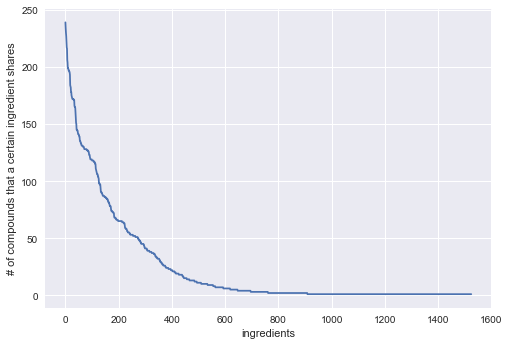

In [41]:
x = xrange(len(relations_key_sorted))
y = relations_len_list
labels = relations_key_sorted
plt.plot(y)
plt.xlabel('ingredients')
plt.ylabel('# of compounds that a certain ingredient shares')
plt.show()

In [5]:
for rela in inverse_relations:
    comp_id, ingr_id_list = rela, inverse_relations[rela]
    #print "Compound:", compounds[comp_id][0]
    #print "Compound CAS Number:", compounds[comp_id][1]
    #print "# of Ingredient Contain:", len(ingr_id_list)
    for ingr_id in ingr_id_list:
        print ingredients[ingr_id][0],
    print
    #print
    #print

starch
thaumatococcus_daniellii
bacon baked_potato bean beef black_bean boiled_beef boiled_pork cherimoya cocoa coffee crisp_bread cured_pork dried_kidney_bean enokidake french_bean french_fried_potato fried_beef fried_cured_pork fried_pork grilled_beef grilled_pork guava jamaican_rum katsuobushi kidney_bean licorice lima_bean malt mate matsutake mung_bean mushroom navy_bean okra onion passion_fruit peanut peanut_butter pineapple pinto_bean porcini pork pork_liver pork_sausage potato_chip raisin raw_bean raw_beef raw_peanut raw_pork red_bean red_kidney_bean roasted_beef roasted_cocoa roasted_filbert roasted_malt roasted_mate roasted_onion roasted_peanut roasted_pork rum shiitake smoked_fish smoked_pork smoked_pork_belly snap_bean soybean sweet_potato tamarind tomato uncured_boiled_pork uncured_pork uncured_smoked_pork wheat_bread
apricot bantu_beer bean beer bergamot black_bean black_tea brewed_tea ceylon_tea cinnamon corn_mint dried_black_tea dried_green_tea dried_kidney_bean fermente

apricot bay_laurel boldea_fragrans california_orange cardamom cubeb grapefruit grapefruit_juice israeli_orange laurel lime_peel_oil mastic_gum_leaf_oil orange orange_juice ormenis_multicaulis rosemary zanthoxylum_rhetsa
apple cooked_apple
bantu_beer beef beer black_tea boiled_beef boiled_chicken bone_oil brewed_tea ceylon_tea chicken clam coal_tar cocoa coffee crayfish crisp_bread dried_black_tea dried_green_tea egg fermented_russian_black_tea fermented_shrimp fermented_tea french_fried_potato fried_beef fried_chicken green_tea grilled_beef grilled_pork guineafowl jasmine_tea kola_tea lemon_tree malt mantis_shrimp milk okra orange_tree peach pouching_tea raw_beef raw_chicken roasted_beef roasted_chicken roasted_cocoa roasted_green_tea roasted_malt roasted_pork roasted_shrimp rooibus_tea seychelles_tea shrimp squid tamarind tea vervain_leaf wheaten_bread wild_rice wort
apple artemisia_transiliensis bitter_orange black_tea blue_cheese bread brewed_tea buttermilk camembert_cheese ceylon_t

andropogon_jwarancusa apple artemisia_herba_alba bacon baked_potato banana bantu_beer bean beef beer bell_pepper black_bean black_seabream black_tea blue_cheese boiled_beef boiled_chicken boiled_meat boiled_mutton boiled_pork botrytized_wine brandy bread brewed_tea brown_rice buckwheat butter butterfat cabernet_sauvignon_grape cabernet_sauvignon_wine calamus camembert_cheese camphor cardamom catfish ceylon_tea chamomile champagne_wine cheddar_cheese cheese cherimoya chicken chinese_quince cider clam cocoa coconut coconut_oil cod coffee comte_cheese concord_grape cooked_apple coriander corn corn_oil cottage_cheese cranberry cream_cheese crisp_bread cryptomeria_japonica cured_ham cured_pork cymbopogon_javanensis dill domiati_cheese dried_black_tea dried_fig dried_green_tea dried_kidney_bean eel egg elderberry emmental_cheese enokidake european_cranberry ewe fatty_fish fermented_russian_black_tea fermented_shrimp fermented_tea feta_cheese fig fish frankfurter french_bean french_fried_pota

coffee
ashanti_pepper bell_pepper bergamot bergamot_oil berry bilberry black_chokeberry black_chokecherry black_currant black_pepper black_raspberry blackberry blueberry bog_blueberry botrytized_wine cabernet_sauvignon_wine california_orange california_pepper cape_gooseberry capsicum capsicum_annuum cayenne celery champagne_wine chokeberry cinnamon citrus citrus_juice citrus_peel citrus_peel_oil clary_sage cloudberry clove cowberry cranberry crowberry crownberry elderberry ethiopian_pepper european_cranberry french_lavender french_marigold_oil green_bell_pepper guinea_pepper huckleberry israeli_orange italian_lime japanese_mint jasmine juniper_berry kaffir_lime key_lime_leaf lavandin lavender lemon lime loganberry long_pepper malagueta_pepper mandarin mentha_aquatica mentha_citrata mexican_lime monkey_orange myrtleberry neroli nutmeg orange pepper petitgrain port_wine rabbiteye_blueberry raspberry red_currant red_wine rose_wine sage sassafras satsuma sherry sparkling_wine strawberry ta

beef boiled_beef botrytized_wine cabernet_sauvignon_grape cabernet_sauvignon_wine champagne_wine cocoa fried_beef grilled_beef krill malt port_wine raw_beef red_wine roasted_beef roasted_cocoa roasted_malt rose_wine sauvignon_blanc_grape sherry sparkling_wine white_wine wine
mango
japanese_mint mint
enokidake jamaican_rum matsutake mushroom porcini rum shiitake soy_sauce soybean tomato
porcini
agathosma_gnidioides_leaf_oil ceylon_cinnamon french_lavender lavender lavender_oil sour_cherry
strawberry
asparagus bacon bean beef black_bean boiled_beef boiled_pork butter caviar cognac cranberry cured_pork dried_kidney_bean european_cranberry fatty_fish filbert french_bean fried_beef fried_cured_pork fried_pork grilled_beef grilled_pork keta_salmon kidney_bean lima_bean lingonberry malt mango mung_bean navy_bean pea peanut peanut_butter pecan pinto_bean pork pork_liver pork_sausage potato_chip raisin raw_bean raw_beef raw_fatty_fish raw_pea raw_peanut raw_pork raw_soybean_oil red_bean red_kid

passion_fruit passion_fruit_juice
baked_potato black_seabream catfish cod corn eel fatty_fish fish french_fried_potato globefish haddock herring horse_mackerel keta_salmon kidney_bean lean_fish lima_bean mackerel mashed_potato milk pike pilchard potato raw_fatty_fish raw_fish raw_lean_fish raw_potato red_meat salmon sea_bass smoked_fatty_fish smoked_fish smoked_herring smoked_salmon sweetfish tuna whitefish
cinnamon cinnamon_oil
apple apricot ashanti_pepper avocado banana banana_passion_fruit bartlett_pear bean bell_pepper berry bilberry bitter_orange black_bean black_chokeberry black_chokecherry black_currant black_pepper black_raspberry black_sesame_seed black_tea blackberry blenheim_apricot blueberry bog_blueberry brewed_tea buchu buchu_oil cabernet_sauvignon_grape caja_fruit calamus california_orange california_pepper cantaloupe cape_gooseberry capsicum capsicum_annuum cardamom carob_fruit carrot cayenne celery ceylon_tea cherry chinese_quince choke_cherry chokeberry cinnamon citru

apple asparagus avocado bacon baked_potato banana bartlett_pear bean beef bell_pepper berry bilberry bitter_orange black_bean black_chokeberry black_chokecherry black_currant black_raspberry black_tea blackberry blue_cheese blueberry bog_blueberry boiled_beef boiled_chicken boiled_meat boiled_mutton boiled_pork botrytized_wine brazil_nut bread brewed_tea brown_rice butter cabbage cabernet_sauvignon_grape cabernet_sauvignon_wine california_orange camembert_cheese cantaloupe cape_gooseberry cardamom cashew celery ceylon_tea champagne_wine cheddar_cheese cheese cherry chicken chokeberry cider citrus citrus_juice citrus_peel citrus_peel_oil cloudberry cocoa coconut coffee cognac comte_cheese concord_grape cooked_apple coriander corn corn_oil cottage_cheese cowberry cranberry cream_cheese crisp_bread crowberry crownberry cucumber cured_ham cured_pork domiati_cheese dried_black_tea dried_fig dried_green_tea dried_kidney_bean elderberry emmental_cheese endive enokidake european_cranberry ewe 

apple apricot banana bantu_beer bartlett_pear beef beer blue_cheese boiled_beef cantaloupe chinese_quince citrus_peel citrus_peel_oil cooked_apple dwarf_quince fried_beef ginger grilled_beef jamaican_rum japanese_plum litsea_zeylanica litsea_zeylanica_oil malt_whiskey melon muskmelon pear quince raw_beef roasted_beef rum sparkling_wine
cocoa roasted_cocoa
capsicum capsicum_annuum cayenne solanaceae
apple baked_potato banana beef blackberry blue_cheese boiled_beef cooked_apple fried_beef grilled_beef hop hop_oil monkey_orange mountain_papaya orris prickly_pear raw_beef roasted_beef rooibus_tea starfruit vanilla white_wine wort
jamaican_rum rum
carrot
bystropogon_mollis_leaf_oil french_peppermint japanese_mint japanese_peppermint mint mint_oil pennyroyal pennyroyal_oil peppermint peppermint_oil
apple apple_juice banana bantu_beer beer botrytized_wine cabernet_sauvignon_wine california_orange champagne_wine chinese_quince cocoa cognac concord_grape cooked_apple dwarf_quince honey israeli_

apple apple_juice banana bartlett_pear bean beef black_bean black_seabream boiled_beef butter catfish cod coffee cooked_apple cream dried_kidney_bean eel fatty_fish fermented_shrimp fish fish_oil french_bean fried_beef globefish grilled_beef haddock herring horse_mackerel keta_salmon kidney_bean lean_fish lima_bean mackerel mango mantis_shrimp mung_bean navy_bean parmesan_cheese peach peanut peanut_butter peanut_oil pear pecan pike pilchard pinto_bean plum_brandy plumcot raw_bean raw_beef raw_fatty_fish raw_fish raw_lean_fish raw_peanut red_bean red_kidney_bean roasted_beef roasted_chicken roasted_peanut roasted_pecan roasted_sesame_seed roasted_shrimp salmon sea_bass sesame_seed shrimp smoked_fatty_fish smoked_fish smoked_herring smoked_salmon snap_bean soybean spearmint spearmint_oil sweetfish toasted_sesame_seed tuna whitefish yellow_passion_fruit
algerian_geranium_oil american_peppermint american_peppermint_oil asparagus baked_potato bantu_beer bean beef beer berry bilberry black_b

apple apricot asparagus avocado baked_potato bantu_beer bean beer berry bilberry black_bean black_chokeberry black_chokecherry black_currant black_raspberry black_tea blackberry blue_cheese blueberry bog_blueberry boiled_chicken boiled_crab botrytized_wine brazil_nut bread brewed_tea brown_rice buckwheat butter cabbage cabernet_sauvignon_grape cabernet_sauvignon_wine calamus california_orange camembert_cheese cantaloupe cape_gooseberry cashew ceylon_tea champagne_wine cheddar_cheese cheese chicken chinese_quince chokeberry cider cinnamon clary_sage cloudberry cocoa coconut coffee cognac comte_cheese concord_grape congo_geranium cooked_apple corn_salad cottage_cheese cowberry crab cranberry cream_cheese crisp_bread crowberry crownberry domiati_cheese dried_black_tea dried_fig dried_green_tea dried_kidney_bean dwarf_quince elderberry emmental_cheese endive enokidake european_cranberry fermented_russian_black_tea fermented_shrimp fermented_tea feta_cheese fig filbert french_bean french_fr

wallflower ylangylang
apple apricot bacon baked_potato banana bantu_beer beef beer black_currant black_tea blackberry blue_cheese blueberry boiled_beef boiled_chicken boiled_meat boiled_mutton boiled_pork botrytized_wine bread brewed_tea butter cabbage cabernet_sauvignon_wine california_orange camembert_cheese cantaloupe ceylon_tea champagne_wine cheddar_cheese cheese cherry chicken cider citrus citrus_juice citrus_peel citrus_peel_oil clove cocoa coconut coffee cognac comte_cheese cooked_apple cottage_cheese cranberry cream_cheese crisp_bread cured_ham cured_pork domiati_cheese dried_black_tea dried_green_tea emmental_cheese european_cranberry ewe fermented_russian_black_tea fermented_tea feta_cheese filbert frankfurter french_fried_potato fried_beef fried_chicken fried_cured_pork fried_pork ginger goat_cheese green_tea grilled_beef grilled_pork gruyere_cheese guava guineafowl ham honey israeli_orange italian_lime jamaican_rum jasmine_tea kaffir_lime kola_tea lamb leek lemon limburger

apricot asparagus avocado bacon baked_potato bantu_beer bean beef beer bell_pepper berry bilberry black_bean black_chokeberry black_chokecherry black_currant black_raspberry black_tea blackberry blue_cheese blueberry bog_blueberry boiled_beef boiled_chicken boiled_meat boiled_mutton boiled_pork botrytized_wine bread brewed_tea broccoli brown_rice buckwheat cabernet_sauvignon_grape cabernet_sauvignon_wine california_orange_peel camembert_cheese cantaloupe cape_gooseberry carrot cassava cassia cauliflower celery ceylon_tea champagne_wine cheddar_cheese cheese chicken chinese_quince chokeberry cinnamon citrus_flower_oil citrus_leaf_oil clam cloudberry cocoa coffee cognac comte_cheese concord_grape cooked_apple corn corn_oil cottage_cheese cowberry cranberry cream_cheese crisp_bread crowberry crownberry cured_ham cured_pork domiati_cheese dried_black_tea dried_green_tea dried_kidney_bean dried_parsley egg elderberry emmental_cheese endive enokidake european_cranberry ewe fermented_russian_

asarum_arifolium_root_oil calamus california_orange_peel cymbopogon_javanensis ginger katsuobushi mastic_gum_fruit_oil mastic_gum_leaf_oil orange_peel orange_peel_oil orthodon_methylisoeugenoliferum
black_tea blackberry brewed_tea ceylon_tea coffee cognac dried_black_tea dried_fig dried_green_tea fermented_russian_black_tea fermented_tea fig green_tea hop hop_oil jasmine_tea kola_tea pea pouching_tea raspberry raw_pea roasted_green_tea rooibus_tea seychelles_tea southern_pea strawberry tea white_wine
black_tea cigarette cognac corn corn_oil corn_salad fermented_shrimp fermented_tea green_tea lemon_balm mantis_shrimp roasted_green_tea roasted_shrimp saffron shrimp
hazelnut roasted_filbert roasted_hazelnut
anise artemisia_ferganensis calamus california_orange caraway celery_seed citrus citrus_juice citrus_oil clove coriander dill dill_seed eucalyptus_globulus french_lavender ginger_grass israeli_orange italian_lime japanese_mint kaffir_lime lavender lemon lime lippia_carviodora litsea_gu

bantu_beer beer black_seabream catfish cod eel fatty_fish fish fish_oil globefish haddock herring hop hop_oil horse_mackerel keta_salmon lean_fish mackerel pike pilchard raw_fatty_fish raw_fish raw_lean_fish salmon sea_bass smoked_fatty_fish smoked_fish smoked_herring smoked_salmon sweetfish tuna whitefish
apple apple_juice cantaloupe comte_cheese cooked_apple melon muskmelon plum strawberry
bergamot_peel_oil bitter_orange black_tea brewed_tea cardamom ceylon_tea chervil dried_black_tea dried_green_tea enokidake fermented_russian_black_tea fermented_tea green_tea hop hop_oil jasmine_tea kola_tea kumquat lemon matsutake mushroom porcini pouching_tea roasted_green_tea rooibus_tea seychelles_tea shiitake tea
bantu_beer beer black_seabream catfish cod durian eel fatty_fish fish fish_oil globefish haddock herring hop hop_oil horse_mackerel keta_salmon lean_fish mackerel pike pilchard raw_fatty_fish raw_fish raw_lean_fish salmon sea_bass smoked_fatty_fish smoked_fish smoked_herring smoked_sa

american_potato_chip bantu_beer beef beer boiled_beef boiled_chicken chicken chive durian fried_beef fried_chicken garlic grilled_beef leek onion raw_beef raw_chicken raw_leek roasted_beef roasted_chicken roasted_onion shallot
chervil chinese_star_anise fennel japanese_star_anise russian_star_anise star_anise
apple apricot banana blue_cheese camembert_cheese cheddar_cheese cheese chinese_quince comte_cheese cooked_apple cottage_cheese cream_cheese domiati_cheese dwarf_quince emmental_cheese feta_cheese goat_cheese gruyere_cheese honey limburger_cheese mozzarella_cheese munster_cheese papaya parmesan_cheese provolone_cheese quince roman_chamomile romano_cheese roquefort_cheese russian_cheese sheep_cheese swiss_cheese tilsit_cheese
ananas_sativus apple apricot artichoke asparagus bacon banana bantu_beer bartlett_pear bean beef beer black_bean blackberry blue_cheese boiled_beef boiled_chicken boiled_crab boiled_pork bourbon_whiskey bread brown_rice butter buttermilk cabernet_sauvignon_gra

bantu_beer beef beer black_seabream black_tea boiled_beef brewed_tea cabernet_sauvignon_grape catfish ceylon_tea chive cod coffee cognac concord_grape corn_salad cranberry dried_black_tea dried_green_tea eel european_cranberry fatty_fish fermented_russian_black_tea fermented_tea fish french_fried_potato fried_beef globefish grape green_tea grilled_beef guava haddock herring horse_mackerel japanese_plum jasmine_tea keta_salmon kola_tea lean_fish leek mackerel mango mate muscadine_grape muscat_grape mustard onion oyster papaya parmesan_cheese peanut peanut_butter pike pilchard pouching_tea prickly_pear pumpkin raw_beef raw_fatty_fish raw_fish raw_lean_fish raw_leek raw_peanut roasted_beef roasted_chicken roasted_green_tea roasted_mate roasted_onion roasted_peanut rooibus_tea salmon sauvignon_blanc_grape sauvignon_grape sea_bass seychelles_tea shallot smoked_fatty_fish smoked_fish smoked_herring smoked_salmon sweetfish tea tuna walnut whitefish
bulgarian_rose bulgarian_rose_oil celery_see

In [23]:
inverse_relations_key_sorted = sorted(inverse_relations, key=lambda k: len(inverse_relations[k]), reverse=True)
inverse_relations_compounds_list = []
inverse_relations_len_list = []
for key in inverse_relations_key_sorted:
    inverse_relations_len_list.append(len(inverse_relations[key]))
    inverse_relations_compounds_list.append(compounds[key])
    print compounds[key], len(inverse_relations[key])

['1-octanol', '111-87-5'] 299
['n-nonanal', '124-19-6'] 298
['isobutyl_alcohol', '78-83-1'] 286
['isoamyl_alcohol', '123-51-3'] 283
['hexyl_alcohol', '111-27-3'] 283
['n-octanal', '124-13-0'] 276
['3-methylbutyraldehyde', '590-86-3'] 268
['octanoic_acid', '124-07-2'] 265
['1-octen-3-ol', '3391-86-4'] 263
['phenylacetaldehyde', '122-78-1'] 261
['hexanoic_acid', '142-62-1'] 258
['alpha-terpineol', '10482-56-1'] 252
['2-methylbutyraldehyde', '96-17-3'] 246
['phenol', '108-95-2'] 245
['phenethyl_alcohol', '60-12-8'] 239
['n-valeraldehyde', '110-62-3'] 226
['2-heptanone', '110-43-0'] 225
['methyl_sulfide', '75-18-3'] 220
['methyl_disulfide', '624-92-0'] 216
['2-pentylfuran', '3777-69-3'] 216
['2-hexenal', '505-57-7'] 214
['nonyl_alcohol', '143-08-8'] 213
['valeric_acid', '109-52-4'] 212
['lauric_acid', '143-07-7'] 212
['heptanoic_acid', '111-14-8'] 210
['myristic_acid', '544-63-8'] 209
['nonanoic_acid', '112-05-0'] 209
['heptyl_alcohol', '111-70-6'] 204
['propyl_alcohol', '71-23-8'] 204
['2

['b-caryophyllene', '87-44-5'] 16
['2-acetylfuran', '1192-62-7'] 16
['p-menth-8-en-2-one', '3792-53-8'] 16
['1,3,5-undecatriene_(a_mixture_of_1,3(e),5(z)-_and_______________1,3(e),5(e)-isomers)', '16356-11-9'] 16
['3,5-dimethyl-1,2-cyclopentadione', '13494-07-0'] 16
['3-decanone', '928-80-3'] 16
['sulfur_dioxide', '7446-09-5'] 16
['4-methyl-2-phenyl-2-pentenal', '26643-91-4'] 16
['1-butanethiol', '109-79-5'] 16
['3,6-dihydro-4-methyl-2-(2-methylpropen-1-yl)-2h-pyran', '1786-08-9'] 16
['ethyl_anthranilate', '87-25-2'] 16
['cinnamic_acid', '621-82-9'] 15
['2-methylbutyl-3-methylbutanoate', '2445-77-4'] 15
['anisole', '100-66-3'] 15
['trans-anethole', '4180-23-8'] 15
['hydroxycitronellal', '107-75-5'] 15
['bisabolene', '495-62-5'] 15
['benzyl_methyl_sulfide', '766-92-7'] 15
['2-methyl-3-furanthiol', '28588-74-1'] 15
['p-dimethoxybenzene', '150-78-7'] 15
['terpinyl_propionate', '80-27-3'] 15
['2,6,6-trimethylcyclohex-2-ene-1,4-dione', '1125-21-9'] 15
['myrtenyl_acetate', '1079-01-2'] 15
['

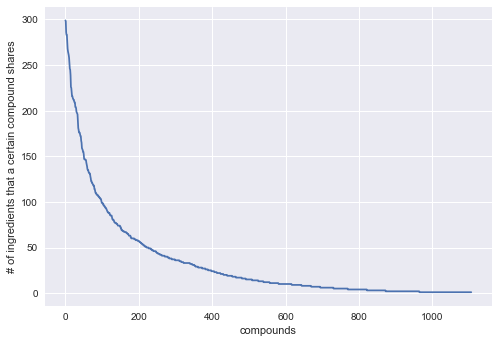

In [39]:
x = xrange(len(inverse_relations_key_sorted))
y = inverse_relations_len_list
labels = inverse_relations_key_sorted
plt.plot(y)
plt.xlabel('compounds')
plt.ylabel('# of ingredients that a certain compound shares')
plt.show()